# Pandas Case Study 2 - Working with Textual Data

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [ ]:
# mov_df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [37]:
import numpy as np
import pandas as pd

In [38]:
mov_df = pd.read_csv("datasets/IMDB Dataset.csv")

In [39]:
mov_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
mov_df.shape

(50000, 2)

In [41]:
# sample review
import random
i = random.randint(1, 50000)
mov_df['review'][i]

'it is of course very nice to see improvements on Turkish movie industry, however, i would have expected something more creative from Togan Gokbakar. starting from the script, which i believe it was not a wise written one as some may think. especially the cheesiness of the dialogs, which were putting the audience in a position that, as if they were not smart enough to understand the situations, which, most of the times makes the movie unbearable. it also has an obvious ending; you can easily guess the murderer from the beginning. the weakest part of the scenario is that the impossibility of seriously mentally ill patients to act like normal people, like professionals right away!!!did they ever search for the possibility of patients who are on heavy medicals, to act like professionals and use all the medical terms that even normal people cannot use?????!!!!!!also in the scene where staff was searching for the most dangerous patient, with out any weapon to protect themselves was another 

## Objectives of the Session

The main objective of this case study is to build the foundation of a **Sentiment Analysis System**, which classifies textual reviews as either:

* **Positive**
* **Negative**

### What we are given

* A **labelled dataset** (reviews + sentiment)
* The dataset will be used to **train a machine learning model**

### What we aim to do

* Clean the text data
* Perform Exploratory Data Analysis (EDA)
* Create meaningful features
* Convert text into numerical form (Vectorization)

> ⚠️ In this session, we will **NOT build or deploy the model**.
> We will stop at **Vectorization**, as modelling and evaluation require additional ML concepts.

---

## Overall Pipeline (Industry Standard)

A typical **Text-based Machine Learning Project** follows these stages:

```
Data Gathering
    ↓
Data Cleaning
    ↓
Preprocessing
    ↓
Exploratory Data Analysis (EDA)
    ↓
Feature Engineering
    ↓
Vectorization
    ↓
Modelling
    ↓
Evaluation
    ↓
Deployment
    ↓
Monitoring
```

---

## Scope of This Session

For this session, we will focus only on:

* **Stage 2:** Data Cleaning
* **Stage 3:** Text Preprocessing
* **Stage 4:** Exploratory Data Analysis
* **Stage 5:** Feature Creation
* **Stage 6:** Vectorization

The remaining stages will be covered in future sessions.

---

## 1. Data Gathering

This step involves collecting the dataset.

Examples:

* CSV file containing reviews
* Data scraped from websites
* Public datasets (Kaggle, UCI, etc.)

👉 In this case study, **data is already provided**, so we will directly move to cleaning.

---

## 2. Data Cleaning (Very Important)

Text data is usually **messy and noisy**. Cleaning ensures consistency and improves model performance.

### Common Cleaning Steps

#### 1. Lowercasing

Convert all text to lowercase to avoid treating the same word differently.

Example:

```
"Good Movie" → "good movie"
```

---

#### 2. Removing Leading and Trailing Spaces

Removes unnecessary whitespaces at the beginning and end of text.

---

#### 3. Removing HTML Tags

Text data scraped from websites often contains HTML elements.

Example:

```
"<br>Nice movie</br>" → "Nice movie"
```

---

#### 4. Removing URLs

URLs usually do not add sentiment value.

Example:

```
"Check this https://xyz.com" → "Check this"
```

---

#### 5. Expanding Abbreviations

Convert short forms into full words.

Examples:

```
"can't" → "cannot"
"won't" → "will not"
```

This improves clarity and consistency.

---

#### 6. Spelling Correction

Fix spelling mistakes that may confuse the model.

Example:

```
"awesme" → "awesome"
```

---

#### 7. Removing Punctuation

Punctuation generally does not contribute to sentiment classification.

---

#### 8. Removing Special Characters

Remove symbols like:

```
@ # $ % ^ & * ~
```

---

## 3. Text Preprocessing

*(Helps the model learn more efficiently)*

---

### 1. Tokenization

Breaking text into smaller units called **tokens** (usually words).

Example:

```
"I love movies" → ["I", "love", "movies"]
```

---

### 2. Stop Word Removal

Removing commonly used words that do not carry significant meaning.

Examples:

```
is, am, are, the, a, an, in
```

---

### 3. Stemming

Reducing words to their root form.

Examples:

```
"playing" → "play"
"loved" → "love"
```

> Note: Stemming may produce non-dictionary words, but it improves performance.

---

## 4. Exploratory Data Analysis (EDA)

EDA helps us **understand the text data** before modelling.

### Common EDA Tasks in Text Data

* Distribution of positive vs negative reviews
* Length of reviews
* Most frequent words
* Word clouds
* Class imbalance detection

EDA helps answer questions like:

* Are reviews mostly short or long?
* Is the dataset biased?
* Which words dominate each sentiment?

---

## 5. Feature Creation (Feature Engineering)

Feature creation involves deriving **new useful information** from text.

### Examples of Features

* Review length (number of words / characters)
* Count of positive words
* Count of negative words
* Presence of exclamation marks
* Uppercase word count

These features may significantly improve model performance.

---

## 6. Vectorization

Machine Learning models **cannot understand text**, they only work with numbers.

Therefore, we convert text into **numerical vectors**.

### Common Vectorization Techniques

* **Bag of Words (BoW)**
* **TF-IDF (Term Frequency – Inverse Document Frequency)**
* **Word2Vec**
* **GloVe**
* **FastText**

For this session, we will focus on **basic vectorization concepts**.

---

## Libraries Used

In addition to **Pandas**, we will use:

* **scikit-learn** → Vectorization, ML utilities
* **nltk** → NLP preprocessing
* **textblob** → Spelling correction, sentiment utilities
* **re (regex)** → Pattern-based text cleaning

---

## Key Takeaway

* Text data requires **heavy preprocessing**
* Cleaning and preprocessing directly affect model accuracy
* Vectorization is the bridge between **text and machine learning**
* This session builds the **foundation** for future NLP modelling

In [43]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [44]:
mov_df.duplicated().sum()

np.int64(418)

Has **no null values**, but has **418 duplicated rows**.

In [45]:
mov_df = mov_df.drop_duplicates()
mov_df.duplicated().sum()

np.int64(0)

## Cleaning
From here and now, we will start the process of **Data Cleaning**.

In [46]:
# making the data lowercase
mov_df['review'] = mov_df['review'].str.lower()
mov_df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [47]:
# strip leading and trailing whitespaces
mov_df['review'] = mov_df['review'].str.strip()
mov_df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [48]:
# remove html tags
mov_df['review'] = mov_df['review'].str.replace(r'<.*?>','')
mov_df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [49]:
# code to remove a URL from review
mov_df['review'] = mov_df['review'].str.replace(r"https?://\S+|www\.\S+", '')

In [50]:
# code to check if a review contains an URL
mov_df[mov_df['review'].str.contains(r"https?://\S+|www\.\S+")]

,review,sentiment
742,mario lewis of the competitive enterprise inst...,negative
907,following directly from where the story left o...,positive
1088,this quasi j-horror film followed a young woma...,negative
1137,i really think i should make my case and have ...,positive
1141,this show has to be my favorite out of all the...,positive
...,...,...
48887,trite and unoriginal. it's like someone watche...,negative
49063,"trick or treat, quickie review this zany romp ...",positive
49596,"this is absolutely the best 80s cartoon ever, ...",positive
49637,if you liked the richard chamberlain version o...,positive


In [52]:
# func for expanding abbreviations of contraction words
# expand 

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [53]:
# expanding abbreviations of contraction words
import re
mov_df['review'] = mov_df['review'].apply(remove_abb)
mov_df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    I am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [54]:
# trying TextBlob for spelling correction
from textblob import TextBlob

text = "hi, i can driv at nigga"
TextBlob(text).correct().string

'hi, i can drive at night'

In [55]:
# func for spelling correcting using TextBlob
def spelling_correction(text):
    return TextBlob(text).correct().string

> The operations ahead will cost tedious time and huge resources if employed on the whole approximately 50K rows. Therefore, slicing the data to 10K rows and then performing the operations on that.

In [56]:
# slicing the data to reduce operation time
mov_df = mov_df.iloc[: 10000]

In [57]:
mov_df['review'] = mov_df['review'].apply(spelling_correction)

KeyboardInterrupt: 

## Spelling Correction (Practical Considerations)

We applied spelling correction using **TextBlob** with the following approach:

```python
mov_df['review'] = mov_df['review'].apply(spelling_correction)
```

Where the function is defined as:

```python
# function for spelling correction using TextBlob
def spelling_correction(text):
    return TextBlob(text).correct().string
```

---

### Why TextBlob Spelling Correction Is Slow

* `TextBlob.correct()` internally uses a **probabilistic spell checker**
* It evaluates **multiple word-level corrections**
* Each sentence is processed **independently**
* There is **no vectorization or batch processing**

As a result:

* Time complexity increases **linearly with dataset size**
* Long reviews make it **significantly slower**
* Large datasets can take **hours or even days** to process

---

### Practical Limitation

⚠️ **With limited system resources (CPU, RAM)**, running spelling correction on an entire dataset using TextBlob is **not feasible**.

This is especially true when:

* Dataset contains **thousands or millions** of reviews
* Running on **local machines or low-memory environments**
* Working inside **Jupyter notebooks or free cloud tiers**

---

### Industry Practice

In real-world projects:

* Spelling correction is often:

  * ❌ **Skipped**
  * ✅ Applied only to **small samples**
  * ✅ Applied selectively to **important tokens**
* Models like **TF-IDF and word embeddings** are often robust to minor spelling mistakes
* Deep learning models can learn patterns **despite noisy text**

---

### Conclusion

> Although spelling correction can improve text quality,
> **its computational cost outweighs its benefit** in many real-world scenarios.

Therefore, for this session:

* We **demonstrate the concept**
* But **do not execute spelling correction on the full dataset**
* This step is **commented out or skipped** due to performance constraints

This decision reflects **practical data science**, not theoretical perfection.

In [58]:
# function for removing punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i, '')
    return text

In [60]:
mov_df['review'] = mov_df['review'].apply(remove_punctuation)
mov_df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [61]:
from nltk.tokenize import word_tokenize

In [62]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/harshchandra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/harshchandra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/harshchandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
# tokenization
mov_df['tokenized_review'] = mov_df['review'].apply(word_tokenize)
mov_df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production br br the filmin...,positive,"[a, wonderful, little, production, br, br, the..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [64]:
# stopword removal
from nltk.corpus import stopwords

In [65]:
def remove_stopwords(text):
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
    return L

In [66]:
mov_df['tokenized_review'] = mov_df['tokenized_review'].apply(remove_stopwords)

In [67]:
# stopwords have been removed
mov_df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production br br the filmin...,positive,"[wonderful, little, production, br, br, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [68]:
# a new form given to reviews
mov_df['review'] = mov_df['tokenized_review'].apply(lambda x: " ".join(x))
mov_df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


## Exploratory Data Analysis
### Creation of New Features
Up ahead, we're deriving new features from the data and trying to utilise them for EDA purpose.

In [69]:
# creating new feature character count
mov_df['char_length'] = mov_df['review'].str.len()

In [70]:
# creating new feature word count
mov_df['word_length'] = mov_df['tokenized_review'].apply(len)

In [71]:
mov_df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1151,169
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin...",674,90
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",594,89
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",453,69
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",876,130


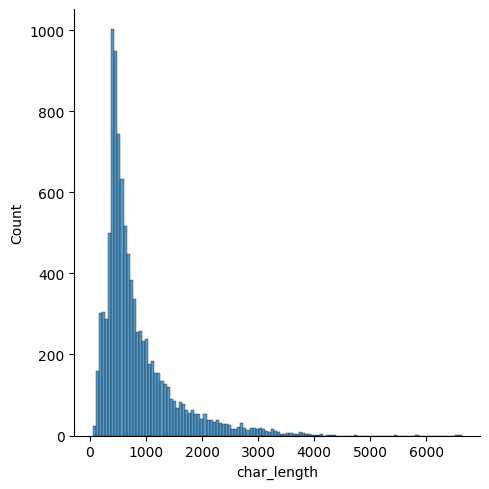

In [72]:
import seaborn as sns

sns.displot(mov_df['char_length'])

We'll now try to find out if the **character length** is a factor impacting the **nature** of review.

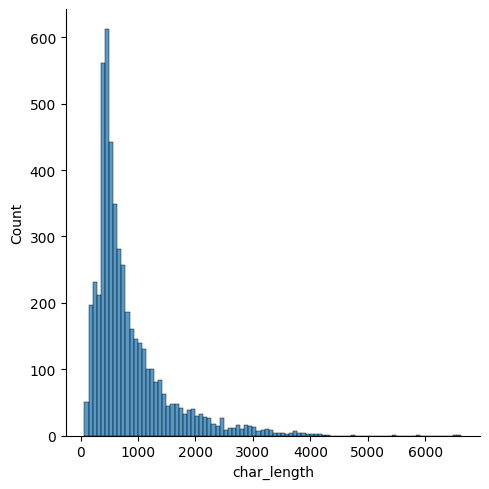

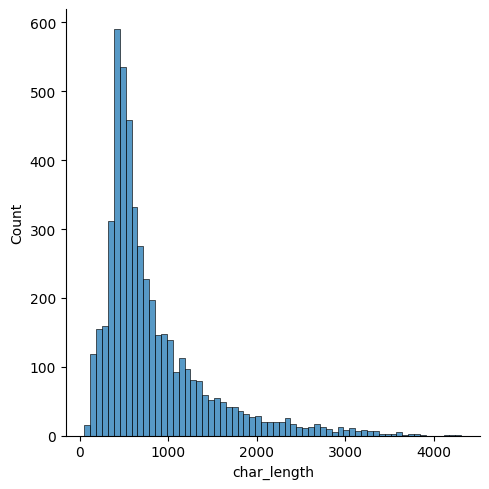

In [73]:
sns.displot(mov_df[mov_df['sentiment'] == 'positive']['char_length'])
sns.displot(mov_df[mov_df['sentiment'] == 'negative']['char_length'])

Now, since the curves are almost overlapping, we may conclude that the **character_length** is an irrelevant feature to identify the **nature** of the review.

## N-grams Analysis

We used the following code to analyze **bigrams** (2-word combinations) in the reviews:

```python
from nltk import ngrams

pd.Series(ngrams(mov_df['tokenized_review'].sum(), 2)).value_counts()
```

---

### What This Code Does (Step-by-Step)

1. **`mov_df['tokenized_review']`**

   * Contains reviews where each review is already **tokenized**
   * Each row is a **list of words**

2. **`.sum()`**

   * Concatenates all tokenized reviews into **one large list of words**
   * Effectively flattens the entire corpus

3. **`ngrams(..., 2)`**

   * Generates **bigrams**
   * Each bigram is a tuple of **two consecutive words**
   * Example:

     ```
     ("very", "good"), ("not", "bad"), ("highly", "recommended")
     ```

4. **`pd.Series(...)`**

   * Converts the list of bigrams into a Pandas Series

5. **`.value_counts()`**

   * Counts how frequently each bigram occurs
   * Helps identify **common word pairs** in the dataset

---

### Why This Is Useful

* Identifies **frequently occurring phrases**
* Helps detect:

  * Common sentiment expressions (`"not good"`, `"very bad"`)
  * Repetitive patterns in reviews
* Can guide:

  * Feature engineering
  * Vocabulary pruning
  * Phrase-based sentiment analysis

---

### Performance Limitation ⚠️

This operation is **computationally expensive** because:

* All reviews are merged into a **single large corpus**
* Number of bigrams grows **linearly with text size**
* `.value_counts()` performs a **full frequency scan**
* No parallelization or batching is used

As a result:

* Execution time becomes **very high**
* System may **freeze or crash** on large datasets
* Not feasible to run on **limited CPU/RAM environments**

---

### Practical Decision

For this session:

* The code is included to **demonstrate the concept**
* We **do not execute** it due to performance constraints
* In real-world pipelines, such analysis is:

  * Performed on **samples**
  * Done using **optimized libraries**
  * Or avoided unless strictly necessary

---

### Note

> Understanding **what the code does** is more important here than executing it.

This reflects **practical data science**, where feasibility and efficiency matter as much as correctness.

In [ ]:
from nltk import ngrams

pd.Series(ngrams(mov_df['tokenized_review'].sum(), 2)).value_counts()

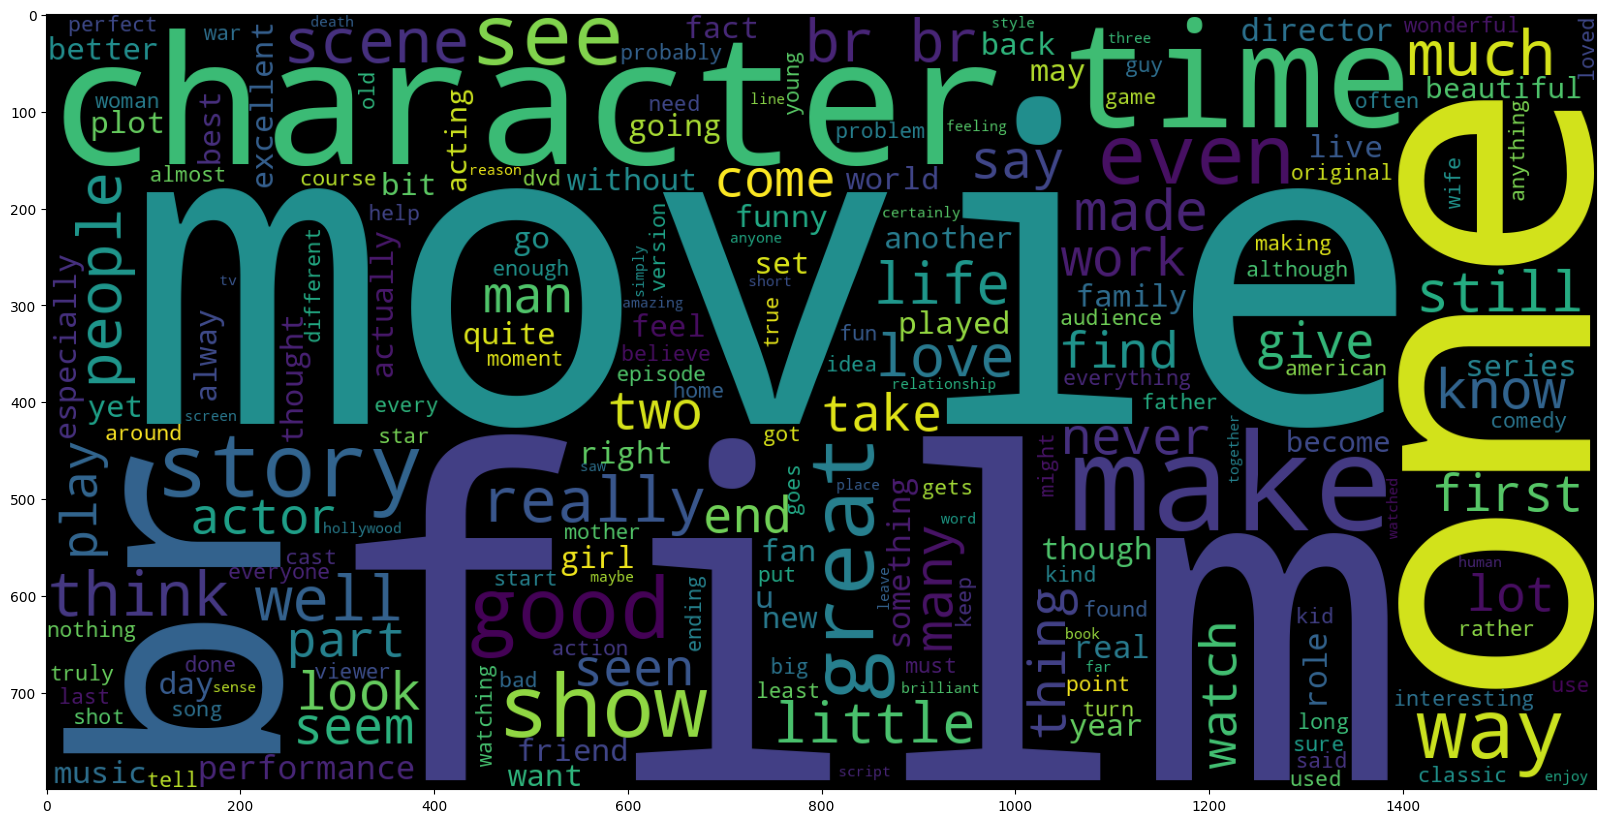

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
wc = WordCloud(width = 1600, height = 800).generate(' '.join(mov_df[mov_df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

## Vectorization

After completing **data cleaning** and **pre-processing**, the next step is **vectorization**.

Machine Learning models **cannot understand raw text**. They only work with **numerical data**.
Vectorization is the process of converting textual data into a **numerical representation** that a model can learn from.

In this session, we use the **Bag-of-Words (BoW)** technique for vectorization.

---

## Bag-of-Words (BoW)

The **Bag-of-Words** model represents text data based on:

* The **frequency of words**
* **Ignoring grammar and word order**
* Treating each document as a “bag” of words

### How Bag-of-Words Works

1. Build a **vocabulary** of unique words from the entire dataset
2. Each document is converted into a vector:

   * Each position corresponds to a word in the vocabulary
   * The value represents the **count of that word** in the document
3. The final result is a **document-term matrix**

Example (conceptual):

| Review       | good | movie | bad |
| ------------ | ---- | ----- | --- |
| "good movie" | 1    | 1     | 0   |
| "bad movie"  | 0    | 1     | 1   |

---

## Code Explanation

```python
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
bag_of_words = count_vectorizer.fit_transform(mov_df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())
```

### Step-by-Step Explanation

#### 1. Importing `CountVectorizer`

```python
from sklearn.feature_extraction.text import CountVectorizer
```

`CountVectorizer` is a Scikit-learn utility that:

* Converts text into numerical vectors
* Implements the Bag-of-Words approach

---

#### 2. Initializing the Vectorizer

```python
count_vectorizer = CountVectorizer(max_features=5000)
```

* `max_features=5000`:

  * Limits the vocabulary to the **5000 most frequent words**
  * Helps reduce:

    * Memory usage
    * Overfitting
    * Noise from rare words

---

#### 3. Fitting and Transforming the Text Data

```python
bag_of_words = count_vectorizer.fit_transform(mov_df['review'])
```

* `fit_transform()` does two things:

  * **Fits**: Learns the vocabulary from the reviews
  * **Transforms**: Converts reviews into numerical vectors
* Output is a **sparse matrix** (efficient storage for mostly-zero data)

---

#### 4. Converting to a DataFrame

```python
bag_of_words = pd.DataFrame(
    bag_of_words.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)
```

* `.toarray()` converts sparse matrix → dense NumPy array
* `get_feature_names_out()`:

  * Returns the vocabulary words
  * Used as column names

---

## What the Output Looks Like

* Rows → Individual reviews
* Columns → Words from the vocabulary
* Cell values → Frequency of that word in the review

Example structure:

| amazing | bad | boring | good | movie |
| ------- | --- | ------ | ---- | ----- |
| 1       | 0   | 0      | 1    | 1     |
| 0       | 1   | 1      | 0    | 1     |
| ...     | ... | ...    | ...  | ...   |

This DataFrame can now be **directly fed into Machine Learning models**.

---

## Using Bigrams or Trigrams

Instead of single words (unigrams), we can also vectorize:

* **Bigrams** (2-word phrases)
* **Trigrams** (3-word phrases)

Example:

```python
CountVectorizer(max_features=5000, ngram_range=(3, 3))
```

* `ngram_range=(3, 3)`:

  * Extracts **only trigrams**
  * Example:

    ```
    "not at all"
    "very well done"
    ```

This can capture **context and sentiment** better than single words, but:

* Increases dimensionality
* Requires more memory and computation

---

## Summary

* Vectorization bridges the gap between **text data** and **ML models**
* Bag-of-Words is:

  * Simple
  * Interpretable
  * Widely used as a baseline
* `CountVectorizer` provides:

  * Vocabulary control
  * N-gram flexibility
  * Efficient transformation pipeline

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
bag_of_words = count_vectorizer.fit_transform(mov_df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())

In [79]:
bag_of_words

,10,100,1000,1010,10br,11,110,12,13,13th,...,you,youbr,young,younger,youth,youthful,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## PCA (Principal Component Analysis)

**Principal Component Analysis (PCA)** is a **dimensionality reduction technique** used to reduce a large number of features into a smaller set while **preserving as much information (variance) as possible**.

In text-based problems like sentiment analysis, vectorization techniques such as **Bag-of-Words** or **TF-IDF** often produce:

* Thousands of features (one per word)
* Very sparse and high-dimensional data
* Increased computation time
* Difficulty in visualization

PCA helps address these problems.

---

## What PCA Does (Conceptually)

1. PCA identifies directions (called **principal components**) in which the data varies the most.
2. These components are:

   * **Orthogonal (uncorrelated)** to each other
   * Ordered by the amount of variance they explain
3. The original high-dimensional data is **projected** onto a smaller number of these components.

Important points:

* PCA is **unsupervised** (it does not use labels like sentiment).
* PCA does **not select features**, it **creates new features**.
* Each principal component is a **linear combination of original features**.

---

## Why PCA is Useful Here

* Bag-of-Words can have **thousands of dimensions**
* Visualizing such data directly is impossible
* PCA allows:

  * Noise reduction
  * Faster computation
  * Visualization in 2D or 3D
  * Better understanding of class separability

---

## Code Explanation

```python
from sklearn.decomposition import PCA
```

Imports the PCA implementation from Scikit-learn.

---

```python
pca = PCA(n_components=2)
```

* `n_components=2`:

  * Reduces the data to **2 dimensions**
  * Enables **2D visualization**
* These two components capture the **maximum possible variance** in the data among all 2D projections.

---

```python
pca_result = pca.fit_transform(bag_of_words.values)
```

* `fit_transform()` performs two operations:

  * **fit**: Learns the principal components from the data
  * **transform**: Projects the original data onto those components
* `bag_of_words.values`:

  * Converts the DataFrame into a NumPy array
  * PCA works on numerical arrays

The result is a **compressed representation** of the original data.

---

```python
pca_result.shape
```

* Output will be:

  ```
  (number_of_reviews, 2)
  ```
* Each review is now represented by **only two numerical values** instead of thousands of word features.

---

## Visualization Using PCA Output

```python
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=mov_df['sentiment']
)
```

### What This Plot Represents

* X-axis → First principal component
* Y-axis → Second principal component
* Each point → A review
* Color (`hue`) → Sentiment label (positive / negative)

This visualization helps us:

* See whether positive and negative reviews form **distinct clusters**
* Understand how well the data is **separable**
* Gain intuition about the effectiveness of our preprocessing and vectorization

---

## Important Notes and Limitations

* PCA is **not a classifier**
* It is mainly used for:

  * Visualization
  * Dimensionality reduction
  * Preprocessing before modeling
* PCA may discard some information, especially when reducing to very few components
* Interpretability of components is **low**, especially in text data

---

## Summary

* PCA reduces high-dimensional text data into fewer dimensions
* It preserves maximum variance while removing redundancy
* In this case:

  * Bag-of-Words → High-dimensional
  * PCA → 2D representation
* Useful for:

  * Visualization
  * Understanding data structure
  * Speeding up downstream tasks

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [83]:
pca_result.shape

(10000, 2)

<Axes: >

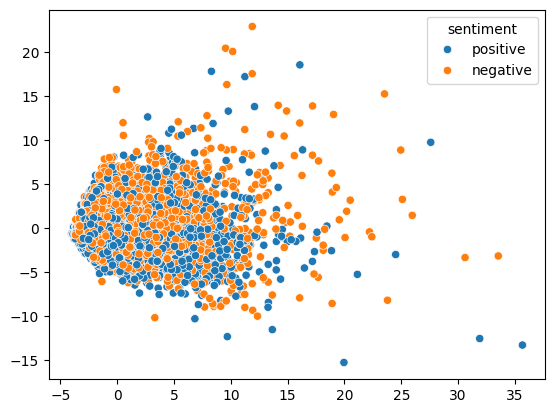

In [85]:
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=mov_df['sentiment'])